# Other distance metrics

The [basic usage page](./using_basic_api.ipynb) demonstrated the ``plscan``'s most
common input type: feature-vector with Euclidean distance. ``plscan`` supports
several other distance metrics and inputs. Let's load libraries and grab some
data to demonstrate:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from plscan import PLSCAN

plt.rcParams["figure.dpi"] = 150
plt.rcParams["figure.figsize"] = (2.75, 0.618 * 2.75)

mst = np.load("data/mst.npy")
data = np.load("data/data.npy")

### Non Euclidean distances

``plscan`` uses ``scikit-learn``'s kd-tree and ball-tree to efficiently find
neighbors and compute the minimum spanning tree. All distance metrics supported
by these space trees are also supported by ``plscan``. 


In [3]:
print(PLSCAN.VALID_BALLTREE_METRICS)

['euclidean', 'l2', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity', 'minkowski', 'p', 'seuclidean', 'braycurtis', 'canberra', 'haversine', 'mahalanobis', 'hamming', 'dice', 'jaccard', 'russellrao', 'rogerstanimoto', 'sokalsneath']


For example, using the minkowski distance with power factor 3.3:

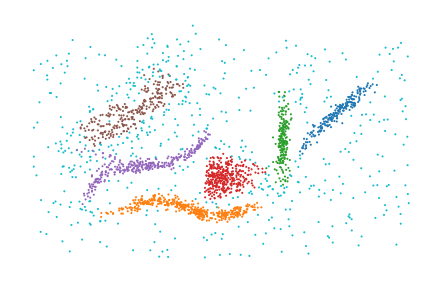

In [4]:
labels = PLSCAN(
    space_tree="ball_tree", metric="minkowski", metric_kws=dict(p=3.3)
).fit_predict(data)

plt.scatter(*data.T, c=labels % 10, s=1, linewidth=0, cmap="tab10")
plt.axis("off")
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()

### Precomputed distances

``plscan`` supports pre-computed distance in several formats:

- (sparse) distance matrices:

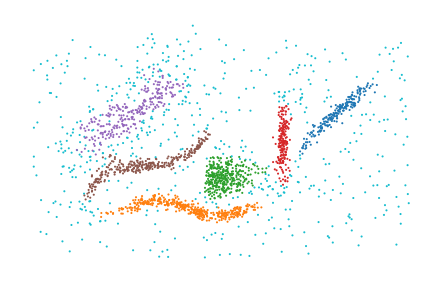

In [5]:
from sklearn.metrics import pairwise_distances

dists = pairwise_distances(data)
labels = PLSCAN(metric="precomputed").fit_predict(dists)

plt.scatter(*data.T, c=labels % 10, s=1, linewidth=0, cmap="tab10")
plt.axis("off")
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()

- condensed distance matrices:

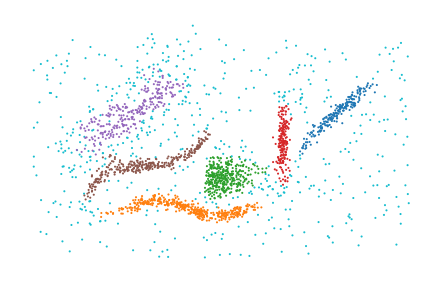

In [6]:
from scipy.spatial.distance import pdist

dists = pdist(data)
labels = PLSCAN(metric="precomputed").fit_predict(dists)

plt.scatter(*data.T, c=labels % 10, s=1, linewidth=0, cmap="tab10")
plt.axis("off")
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()

- precomputed minimum spanning trees:

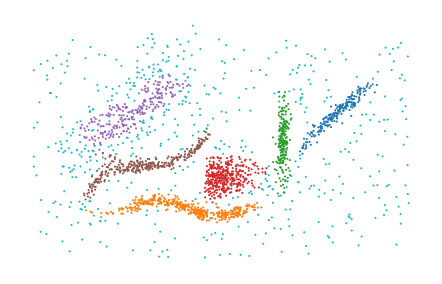

In [7]:
# min_samples=5 matches the precomputed MST.
labels = PLSCAN(min_samples=5, metric="precomputed").fit_predict((mst, data.shape[0]))

plt.scatter(*data.T, c=labels % 10, s=1, linewidth=0, cmap="tab10")
plt.axis("off")
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()

- k-nearest neighbors lists

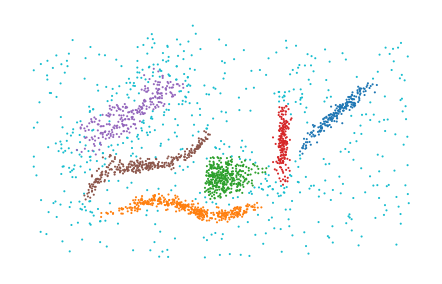

In [8]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=10).fit(data).kneighbors(data)
labels = PLSCAN(metric="precomputed").fit_predict(knn)

plt.scatter(*data.T, c=labels % 10, s=1, linewidth=0, cmap="tab10")
plt.axis("off")
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()

- sparse distance matrices:

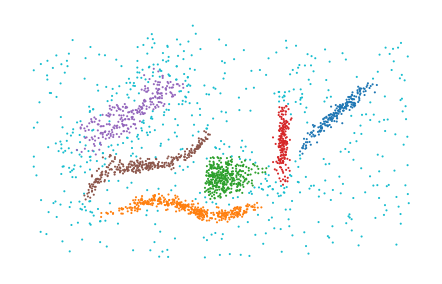

In [9]:
g_knn = (
    NearestNeighbors(n_neighbors=10).fit(data).kneighbors_graph(data, mode="distance")
)
labels = PLSCAN(metric="precomputed").fit_predict(g_knn)

plt.scatter(*data.T, c=labels % 10, s=1, linewidth=0, cmap="tab10")
plt.axis("off")
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()